### Student Information

Name: Orison

Student ID: 106065425

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

# Dataset Information

Sentiments Labelled

This dataset was created for the paper 'From Group to Individual Labels using Deep Features'

It uses a sentence score, either 1 or 0 to determine if the sentence is positive or negative, respectively. They were selected from three different websites. No neutral sentences were intended for selection.



# 0. Importing Libraries

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [261]:
import pandas as pd
import numpy as np
import nltk

from nltk.tokenize import word_tokenize

from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

In [321]:
import plotly
plotly.tools.set_credentials_file(username='orison09', api_key='wANDGPnZzaZawvyMJ61O')

# 1. Data Source

# 2. Preparing the Data

First let's load some data and see if it works well.

In [249]:
imdb = pd.read_csv("data/imdb_labelled.txt", header=0, sep='\t',quoting=3, names = ["Sentence","Score"])
yelp = pd.read_csv("data/yelp_labelled.txt", header=0, sep='\t',quoting=3, names = ["Sentence","Score"])
amazon = pd.read_csv("data/amazon_cells_labelled.txt", header=0, sep='\t',quoting=3, names = ["Sentence","Score"])

In [128]:
print (imdb)

                                              Sentence  Score
0    Not sure who was more lost - the flat characte...      0
1    Attempting artiness with black & white and cle...      0
2         Very little music or anything to speak of.        0
3    The best scene in the movie was when Gerardo i...      1
4    The rest of the movie lacks art, charm, meanin...      0
5                                  Wasted two hours.        0
6    Saw the movie today and thought it was a good ...      1
7                                 A bit predictable.        0
8    Loved the casting of Jimmy Buffet as the scien...      1
9                 And those baby owls were adorable.        1
10   The movie showed a lot of Florida at it's best...      1
11   The Songs Were The Best And The Muppets Were S...      1
12                                   It Was So Cool.        1
13   This is a very "right on case" movie that deli...      1
14   It had some average acting from the main perso...      0
15   Thi

In [243]:
len(imdb)

999

In [107]:
print(imdb.shape)

(999, 2)


In [108]:
imdb[0:10]

,Sentence,Score
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
5,Wasted two hours.,0
6,Saw the movie today and thought it was a good ...,1
7,A bit predictable.,0
8,Loved the casting of Jimmy Buffet as the scien...,1
9,And those baby owls were adorable.,1


In [111]:
imdb.sample(n=25)

,Sentence,Score
41,Not only did it only confirm that the film wou...,0
767,PS the only scene in the movie that was cool i...,1
914,I didn't realize how wonderful the short reall...,1
10,The movie showed a lot of Florida at it's best...,1
890,Now this is a movie I really dislike.,0
330,"For those that haven't seen it, don't waste yo...",0
329,"The hockey scenes are terrible, defensemen pla...",0
986,This movie is well-balanced with comedy and dr...,1
467,I knew when I saw the film that more great thi...,1
805,The worst one of the series.,0


In [114]:
print(imdb.Sentence[0])

Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  


In [113]:
print(imdb.Score[0])

0


In [126]:
imdb.Score[:10]

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    1
Name: Score, dtype: int64

# 3. Checking the Data with Pandas

In [187]:
imdb['Score']

0      0
1      0
2      0
3      1
4      0
5      0
6      1
7      0
8      1
9      1
10     1
11     1
12     1
13     1
14     0
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
      ..
969    1
970    1
971    0
972    0
973    0
974    1
975    1
976    0
977    1
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    0
994    0
995    0
996    0
997    0
998    0
Name: Score, Length: 999, dtype: int64

In [214]:
X = pd.DataFrame.from_records(dmh.format_rows(imdb), columns= ['Scores'])

In [235]:
X = imdb

In [236]:
len(X)

999

In [172]:
imdb[0:10][["Sentence","Score"]]

,Sentence,Score
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
5,Wasted two hours.,0
6,Saw the movie today and thought it was a good ...,1
7,A bit predictable.,0
8,Loved the casting of Jimmy Buffet as the scien...,1
9,And those baby owls were adorable.,1


In [173]:
imdb[-11:-1]

,Sentence,Score
988,":) Anyway, the plot flowed smoothly and the ma...",1
989,"The opening sequence of this gem is a classic,...",1
990,Fans of the genre will be in heaven.,1
991,Lange had become a great actress.,1
992,It looked like a wonderful story.,1
993,I never walked out of a movie faster.,0
994,I just got bored watching Jessice Lange take h...,0
995,"Unfortunately, any virtue in this film's produ...",0
996,"In a word, it is embarrassing.",0
997,Exceptionally bad!,0


In [174]:
imdb.iloc[::10, :][0:10]

,Sentence,Score
0,Not sure who was more lost - the flat characte...,0
10,The movie showed a lot of Florida at it's best...,1
20,"In other words, the content level of this film...",1
30,Waste your money on this game.,1
40,I wasn't the least bit interested.,0
50,In addition to having one of the most lovely s...,1
60,All in all I give this one a resounding 9 out ...,1
70,Often the dialogue doesn't really follow from ...,0
80,This if the first movie I've given a 10 to in ...,1
90,The problem was the script.,0


In [189]:
imdb.loc[405]

Sentence    I liked it.  
Score                   1
Name: 405, dtype: object

In [190]:
imdb['Sentence'][:5]

0    Not sure who was more lost - the flat characte...
1    Attempting artiness with black & white and cle...
2         Very little music or anything to speak of.  
3    The best scene in the movie was when Gerardo i...
4    The rest of the movie lacks art, charm, meanin...
Name: Sentence, dtype: object

# 4. Data Mining

4.1 

In [135]:
imdb.isnull()

,Sentence,Score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [136]:
imdb.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

In [193]:
dummy = pd.Series([" ", " "], index=["Sentence", "Score"])

In [194]:
dummy 

Sentence     
Score        
dtype: object

In [195]:
result_with_series = imdb.append(dummy, ignore_index=True)

In [196]:
len(result_with_series)

1000

In [197]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

In [206]:
dummy_dict = [{'Sentence':'dummy_record'
              }]

In [207]:
X = imdb.append(dummy_dict,ignore_index=True)

In [208]:
len(X)

1000

In [209]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 1)
dtype: object

In [210]:
X.dropna(inplace=True)

In [211]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

4.2 Duplicates

In [237]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

In [238]:
sum(X.duplicated())

3

In [239]:
X.drop_duplicates(keep=False,inplace=True)

In [240]:
len(X)

993

# 5. Sampling

5.1 

In [245]:
X_sample = X.sample(n=100)

In [246]:
len(X_sample)

100

In [247]:
X_sample[0:4]

,Sentence,Score
874,"Then, there's the plot holes.",0
821,It's a long time since I was so entertained by...,1
418,"Only like 3 or 4 buildings used, a couple of l...",0
507,What this film lacks is a convincing script.,0


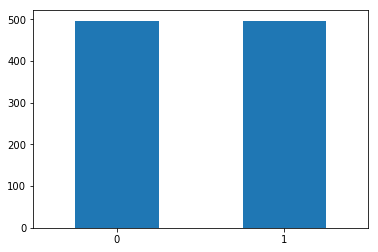

In [255]:
X.Score.value_counts().plot(kind="bar",rot=0)

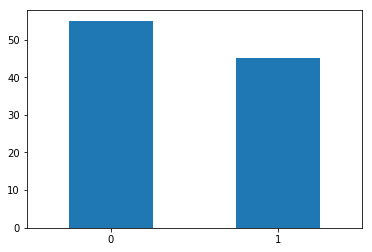

In [254]:
X_sample.Score.value_counts().plot(kind="bar",rot=0)

5.2 Feature Creation

In [267]:
from nltk.tokenize import word_tokenize

In [269]:
X['unigrams'] = X['Sentence'].apply(lambda x: dmh.tokenize_text(x))

In [270]:
X[0:4]

,Sentence,Score,unigrams
0,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
1,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
2,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
3,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."


In [271]:
X[0:4]["unigrams"]

0    [Not, sure, who, was, more, lost, -, the, flat...
1    [Attempting, artiness, with, black, &, white, ...
2    [Very, little, music, or, anything, to, speak,...
3    [The, best, scene, in, the, movie, was, when, ...
Name: unigrams, dtype: object

In [273]:
list(X[0:2]['unigrams'])

[['Not',
  'sure',
  'who',
  'was',
  'more',
  'lost',
  '-',
  'the',
  'flat',
  'characters',
  'or',
  'the',
  'audience',
  ',',
  'nearly',
  'half',
  'of',
  'whom',
  'walked',
  'out',
  '.'],
 ['Attempting',
  'artiness',
  'with',
  'black',
  '&',
  'white',
  'and',
  'clever',
  'camera',
  'angles',
  ',',
  'the',
  'movie',
  'disappointed',
  '-',
  'became',
  'even',
  'more',
  'ridiculous',
  '-',
  'as',
  'the',
  'acting',
  'was',
  'poor',
  'and',
  'the',
  'plot',
  'and',
  'lines',
  'almost',
  'non-existent',
  '.']]

5.3 Feature Subset Selection

In [275]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)

In [278]:
analyzer = count_vect.build_analyzer()
analyzer(" ".join(list(X[2:5].Sentence)))

['very',
 'little',
 'music',
 'or',
 'anything',
 'to',
 'speak',
 'of',
 'the',
 'best',
 'scene',
 'in',
 'the',
 'movie',
 'was',
 'when',
 'gerardo',
 'is',
 'trying',
 'to',
 'find',
 'song',
 'that',
 'keeps',
 'running',
 'through',
 'his',
 'head',
 'the',
 'rest',
 'of',
 'the',
 'movie',
 'lacks',
 'art',
 'charm',
 'meaning',
 'if',
 'it',
 'about',
 'emptiness',
 'it',
 'works',
 'guess',
 'because',
 'it',
 'empty']

In [279]:
" ".join(list(X[4:5].Sentence))

"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  "

In [281]:
X_counts.shape

(993, 3044)

In [282]:
count_vect.get_feature_names()[0:10]

['10', '12', '13', '15', '15pm', '17', '18th', '1928', '1947', '1948']

In [283]:
X[0:10]

,Sentence,Score,unigrams
0,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat..."
1,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ..."
2,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,..."
3,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ..."
4,"The rest of the movie lacks art, charm, meanin...",0,"[The, rest, of, the, movie, lacks, art, ,, cha..."
5,Wasted two hours.,0,"[Wasted, two, hours, .]"
6,Saw the movie today and thought it was a good ...,1,"[Saw, the, movie, today, and, thought, it, was..."
7,A bit predictable.,0,"[A, bit, predictable, .]"
8,Loved the casting of Jimmy Buffet as the scien...,1,"[Loved, the, casting, of, Jimmy, Buffet, as, t..."
9,And those baby owls were adorable.,1,"[And, those, baby, owls, were, adorable, .]"


In [286]:
X_counts[0:10,200:300].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [289]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]

In [290]:
plot_x

['term_10',
 'term_12',
 'term_13',
 'term_15',
 'term_15pm',
 'term_17',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2005',
 'term_2006',
 'term_20th',
 'term_25',
 'term_30',
 'term_40',
 'term_50',
 'term_54',
 'term_70',
 'term_70000',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8pm',
 'term_90',
 'term_95',
 'term_aailiyah',
 'term_abandoned',
 'term_ability',
 'term_about',
 'term_above',
 'term_abroad',
 'term_absolutely',
 'term_abstruse',
 'term_abysmal',
 'term_academy',
 'term_accents',
 'term_accessible',
 'term_acclaimed',
 'term_accolades',
 'term_accurate',
 'term_accurately',
 'term_accused',
 'term_achievement',
 'term_achille',
 'term_ackerman',
 'term_act',
 'term_acted',
 'term_acting',
 'term_action',
 'term_actions',
 'term_actor',
 'term_actors',
 'term_actress',
 'term_actresses',
 'term_actually',
 'term_adams',
 'term_adaptation',
 

In [291]:
plot_y = ["doc_" + str(i) for i in list(X.index)[0:100]]

In [292]:
plot_z = X_counts[0:20, 0:20].toarray()

In [ ]:
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

## 5.4 Dimensionality Reduction

In [298]:
from sklearn.decomposition import PCA

In [300]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [302]:
X_reduced.shape

(993, 3)

In [303]:
trace1 = ta.get_trace(X_reduced,X["Score"], "0", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced,X["Score"], "1", "rgb(52,133,252)")

In [304]:
data_trace = [trace1, trace2]

In [ ]:
layout = go.Layout(
    margin=dict(
     l=0,
     r=0,
     b=0,
     t=0   
    )
)
fig = go.Figure (data = data_trace, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

## 5.5 Attribute Transformation / Aggregation

In [311]:
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [312]:
term_frequencies[0]

array([25])

In [322]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies],"Term Frequency Distribution"))

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~orison09/0 or inside your plot.ly account where it is named 'plot from API'


In [323]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [324]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(),term_frequencies_log],"Term Frequency Distribution"))

## 5.6 Discretization and Binarization 

In [325]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [326]:
mlb = preprocessing.LabelBinarizer()

In [329]:
mlb.fit(X.Score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [330]:
mlb.classes_

array([0, 1])

In [331]:
X['bin_Score'] = mlb.transform(X['Score']).tolist()

In [332]:
X[0:9]

,Sentence,Score,unigrams,bin_Score
0,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat...",[0]
1,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ...",[0]
2,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,...",[0]
3,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ...",[1]
4,"The rest of the movie lacks art, charm, meanin...",0,"[The, rest, of, the, movie, lacks, art, ,, cha...",[0]
5,Wasted two hours.,0,"[Wasted, two, hours, .]",[0]
6,Saw the movie today and thought it was a good ...,1,"[Saw, the, movie, today, and, thought, it, was...",[1]
7,A bit predictable.,0,"[A, bit, predictable, .]",[0]
8,Loved the casting of Jimmy Buffet as the scien...,1,"[Loved, the, casting, of, Jimmy, Buffet, as, t...",[1]
